In [4]:
import pandas as pd
import hydrofunctions as hf
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
AH_ID = '11173200' #Arroyo Hondo USGS station ID
start = '2018-12-01'
end = '2020-1-31'

#Get response object
responseIV = hf.get_nwis(AH_ID,'iv', start, end)
responseDV = hf.get_nwis(AH_ID,'dv', start, end)


#Check Respone
print('IV:\n',responseIV.ok)
print(responseIV.status_code)

print('\nDV:\n',responseDV.ok)
print(responseDV.status_code)

IV:
 True
200

DV:
 True
200


In [9]:
#Convert to json
data_jsonIV = responseIV.json()
data_jsonDV = responseDV.json()

In [10]:
#convert to pandas dataframe, rename columns, turn time index into normal column
dataIV = hf.extract_nwis_df(data_jsonIV)
dataIV.columns = ['iv_flow','qualifiers']

dataDV = hf.extract_nwis_df(data_jsonDV)
dataDV.columns = ['dv_flow','qualifiers']

dataIV

,iv_flow,qualifiers
datetime,,
2018-12-01 00:00:00-08:00,40.6,A
2018-12-01 00:15:00-08:00,39.3,A
2018-12-01 00:30:00-08:00,39.3,A
2018-12-01 00:45:00-08:00,38.0,A
2018-12-01 01:00:00-08:00,38.0,A
...,...,...
2020-01-31 13:00:00-08:00,10.5,P
2020-01-31 13:15:00-08:00,10.5,P
2020-01-31 13:30:00-08:00,10.5,P


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(0, 700)

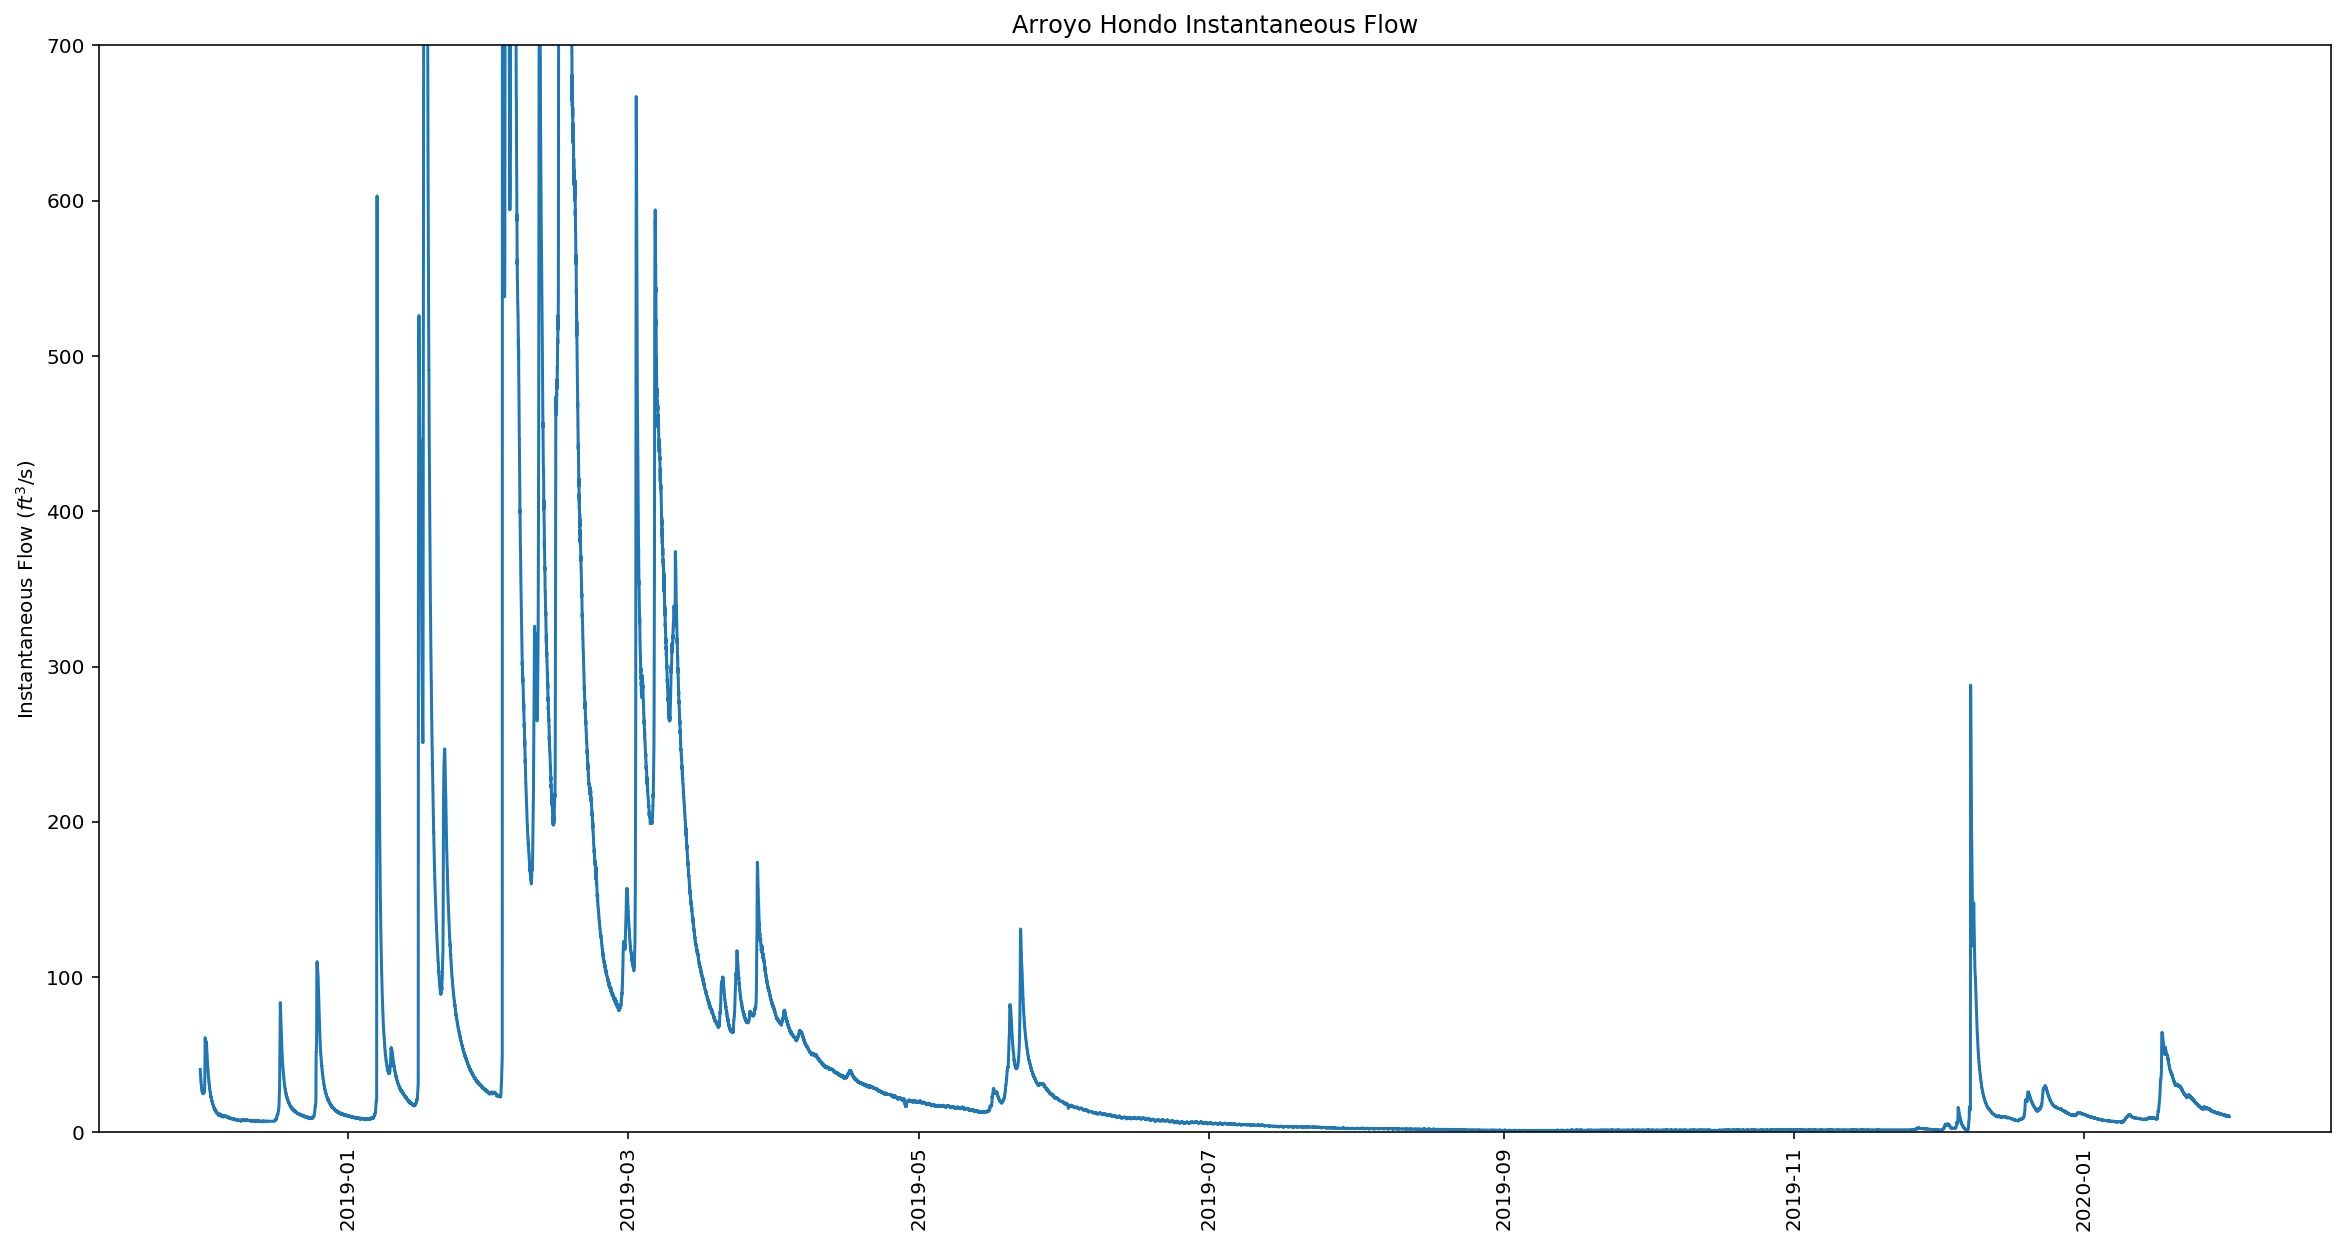

In [11]:
#Plot figure
plt.figure(figsize=(20,10))
plt.plot(dataIV.iv_flow)
plt.title('Arroyo Hondo Instantaneous Flow')
plt.ylabel('Instantaneous Flow ($ft^3$/s)')
plt.xticks(rotation='vertical')
plt.ylim((0, 700)) 

(0, 700)

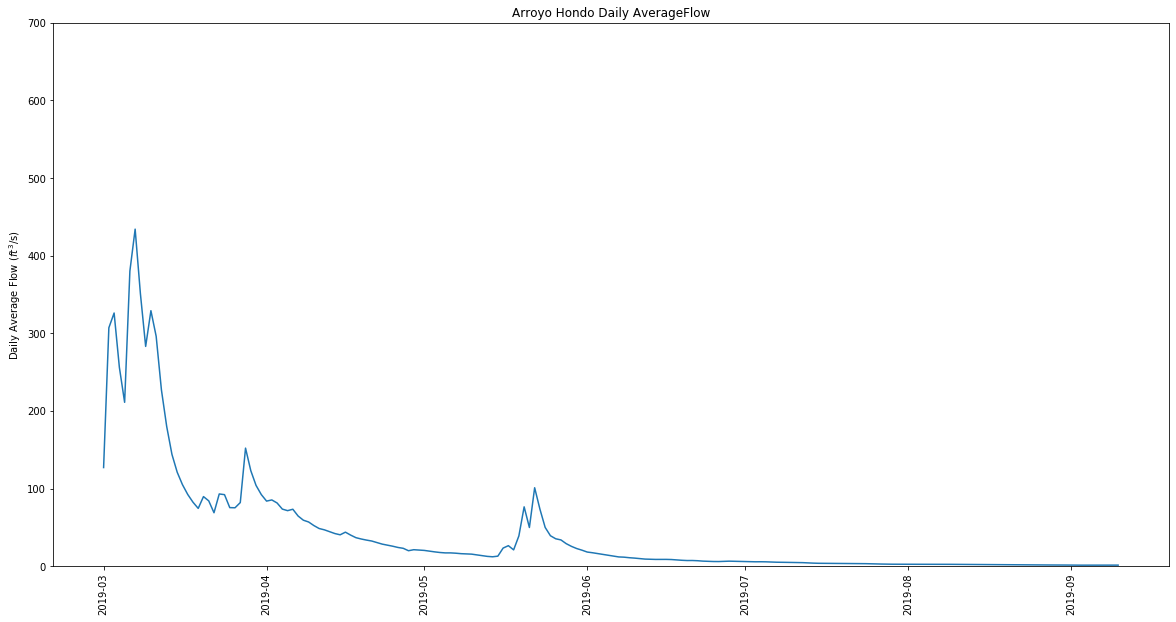

In [20]:
#Plot figure
plt.figure(figsize=(20,10))
plt.plot(dataDV.dv_flow)
plt.title('Arroyo Hondo Daily AverageFlow')
plt.ylabel('Daily Average Flow ($ft^3$/s)')
plt.xticks(rotation='vertical')
plt.ylim((0, 700)) 